In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from matplotlib.dates import DateFormatter

In [2]:
months=[31,28,31,30,31,30,31,31,30,31,30,31]
month_span=[2,4,6,8,10,12]
day_span=[7,23]

count=0
swiss_train=[]
building_train=[]
for j in range(1,14):
    file_name='data/data'+str(1).zfill(2)+str(j).zfill(2)+'.csv'
    data=pd.read_csv(file_name)
    swiss_train.append(data.apply(lambda x: x['DN']*x['area'],axis=1).sum())
    file_name_building='data_building/data_building'+str(1).zfill(2)+str(j).zfill(2)+'.csv'
    data_building=pd.read_csv(file_name_building)
    building_train.append(data_building.apply(lambda x: x['DN']*x['area'],axis=1).sum())
    count+=1

for i in month_span:

    for j in day_span:
        file_name='data/data'+str(i).zfill(2)+str(j).zfill(2)+'.csv'
        data=pd.read_csv(file_name)
        swiss_train.append(data.apply(lambda x: x['DN']*x['area'],axis=1).sum())
        file_name_building='data_building/data_building'+str(i).zfill(2)+str(j).zfill(2)+'.csv'
        data_building=pd.read_csv(file_name_building)
        building_train.append(data_building.apply(lambda x: x['DN']*x['area'],axis=1).sum())
        count+=1

Text(0.5, 1.0, 'Comparison of the Irradiation for all Switzerland and only for rooftops')

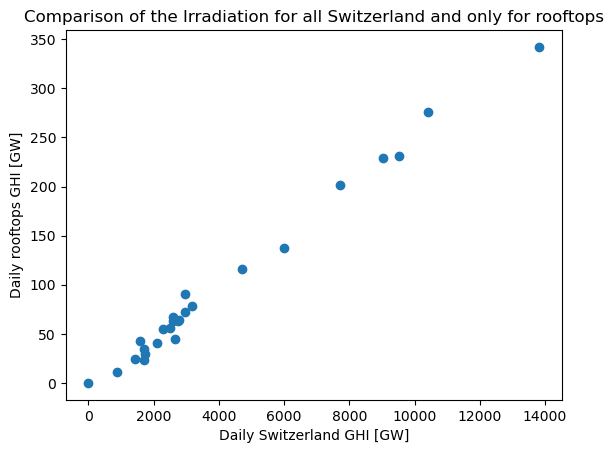

In [3]:
plt.scatter(np.array(swiss_train)/1e9,np.array(building_train)/1e9)

plt.xlabel("Daily Switzerland GHI [GW]")
plt.ylabel("Daily rooftops GHI [GW]")
plt.title("Comparison of the Irradiation for all Switzerland and only for rooftops")


In [4]:
X_train=np.array(swiss_train).reshape(-1,1)
y_train=np.array(building_train).reshape(-1,1)
reg = LinearRegression().fit(X_train, y_train)
r_squared=reg.score(X_train,y_train)
#y=ax+b
coeff=np.append(reg.coef_,reg.intercept_)


count=0
swiss_test=[]
for i in range(1,13):
    for j in range(1,months[i-1]+1):
        file_name='data/data'+str(i).zfill(2)+str(j).zfill(2)+'.csv'
        data=pd.read_csv(file_name)
        swiss_test.append(data.apply(lambda x: x['DN']*x['area'],axis=1).sum())
        count+=1

building_tot=reg.predict(np.array(swiss_test).reshape(-1,1))

Text(0.75, 0.69, '$R^2$=0.991')

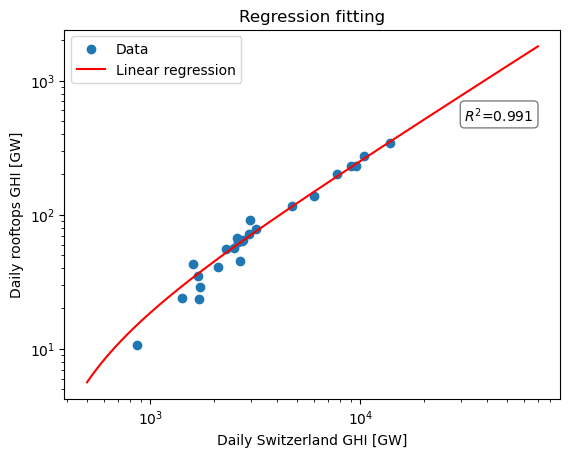

In [5]:
x=np.linspace(5e11,7e13,10000)
y=coeff[0]*x+coeff[1]
text_score = "$R^2$=%0.3f" %r_squared

fig, ax = plt.subplots()
ax.scatter(np.array(swiss_train)/1e9,np.array(building_train)/1e9)
ax.plot(x/1e9,y/1e9,color='red')
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(["Data","Linear regression"])
ax.set_xlabel("Daily Switzerland GHI [GW]")
ax.set_ylabel("Daily rooftops GHI [GW]")
ax.set_title("Regression fitting")
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.75,0.69,text_score,transform=fig.transFigure,bbox=props)


Text(0.5, 1.0, 'Extrapolation of the rooftop data compared to Switzerland irradiation')

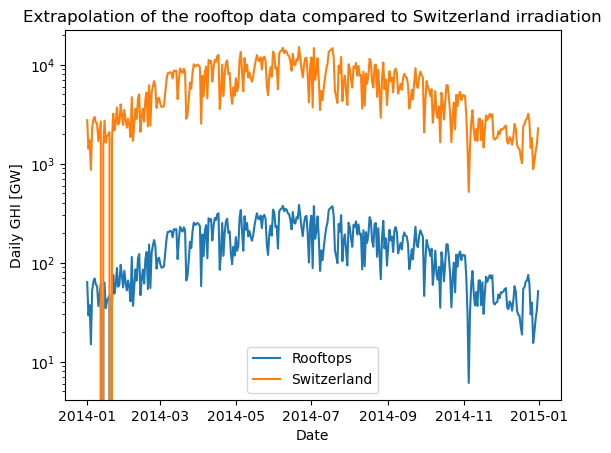

In [6]:
date_range = pd.date_range(start='1/1/2014', end='31/12/2014', freq='D')


fig, ax = plt.subplots()
ax.plot(date_range,building_tot/1e9)
ax.plot(date_range,np.array(swiss_test)/1e9)
ax.set_yscale("log")
ax.legend(["Rooftops","Switzerland"])
ax.set_xlabel("Date")
ax.set_ylabel("Daily GHI [GW]")
ax.set_title("Extrapolation of the rooftop data compared to Switzerland irradiation")



In [7]:
E_pot_real=building_tot.sum()*24*0.10*0.55
E_theoretical=np.array(swiss_test).sum()*24*0.10
print("The realistic potential is %f [TWh_el]" %(E_pot_real/1e12))
print("The theoretical potential is %f [TWh_el]" %(E_theoretical/1e12))
print("The realistic potential is %f%% of the theoretical one" %(E_pot_real/E_theoretical*100))

The realistic potential is 71.700350 [TWh_el]
The theoretical potential is 5281.861616 [TWh_el]
The realistic potential is 1.357483% of the theoretical one


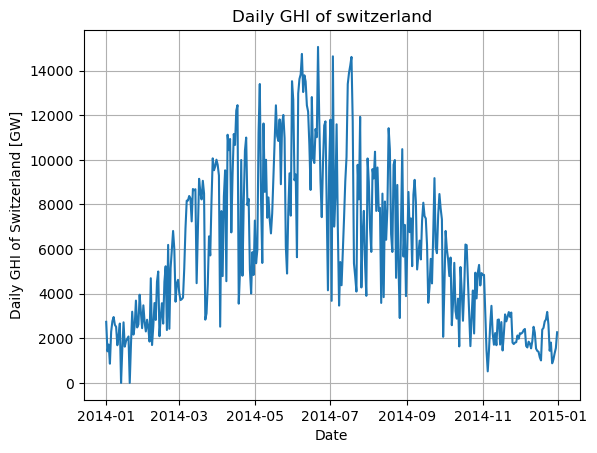

In [8]:
date_range = pd.date_range(start='1/1/2014', end='31/12/2014', freq='D')


fig, ax = plt.subplots()
ax.plot(date_range,np.array(swiss_test)/1e9,)
ax.set_xlabel("Date")
ax.set_ylabel("Daily GHI of Switzerland [GW]")
ax.set_title("Daily GHI of switzerland")
ax.grid()

Seasonal Values

In [43]:
seasons=np.array([building_tot[(353):365].sum()+building_tot[0:(79)].sum(),building_tot[79:(172)].sum(),building_tot[172:(266)].sum(),building_tot[266:(353)].sum()])
seasons=seasons*24*0.1*0.55/1e12
perc=seasons/seasons.sum()
seasonal_values=pd.DataFrame(data={'Seasonal potential [TWhe]':seasons,'Percentage': perc})
seasonal_values=seasonal_values.rename(index={0: "Winter", 1: "Spring",2:"Summer",3:"Autumn"})
seasonal_values=seasonal_values.transpose()
seasonal_values.head()

,Winter,Spring,Summer,Autumn
Seasonal potential [TWhe],10.722277,28.108835,23.946089,8.923148
Percentage,0.149543,0.392032,0.333975,0.124451
